I train a Convolution Neural Network to map DNA sequence onto observed read depth. Let's look at the predictions that the model made on the training set: 

In [1]:
from src.train import unpickle 
training_data, validation_data, training_log = unpickle('trained_model/training_data')
print 'number of training examples:', len(training_data) 
training_data.head()

number of training examples: 4885


,chromosome_number,end,observed_depth,sequence,start,predicted_depth
0,1,10500,294.79,CCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCC...,10200,5.698864
1,1,10800,77.06,TCTGACCTGAGGAGAACTGTGCTCCGCCTTCAGAGTACCACCGAAA...,10500,5.245276
2,1,11100,27.35,CACATGCTAGCGCGTCGGGGTGGAGGCGTGGCGCAGGCGCAGAGAG...,10800,5.855970
3,1,11400,49.95,CTCACGTCACGGTGGCGCGGCGCAGAGACGGGTAGAACCTCAGTAA...,11100,5.678843
4,1,11700,82.31,GCACGCCCACCTGCTGGCAGCTGGGGACACTGCCGGGCCCTCTTGC...,11400,5.368224


In [2]:
validation_data.head()

,chromosome_number,end,observed_depth,sequence,start,predicted_depth
8,1,12900,87.58,GTCTCCCCCCAGGTGTGTGGTGATGCCAGGCATGCCCTTCCCCAGC...,12600,4.999459
14,1,14700,27.81,TGGTTTCTGCTCAGTTCTTTATTGATTGGTGTGCCGTTTTCTCTGG...,14400,5.137764
15,1,15000,83.48,ATTCCCAGTCGTCCTCGTCCTCCTCTGCCTGTGGCTGCTGCGGTGG...,14700,4.801724
17,1,15600,86.95,GGCAGCTTGCCTGGGGTCACAGAGCAAGGCAAAAGCAGCGCTGGGT...,15300,4.936871
23,1,17400,130.71,GGGGCAGCCAACAAGACCTTGTGTGCACCTCCCATGGGTGGAATAA...,17100,4.881037


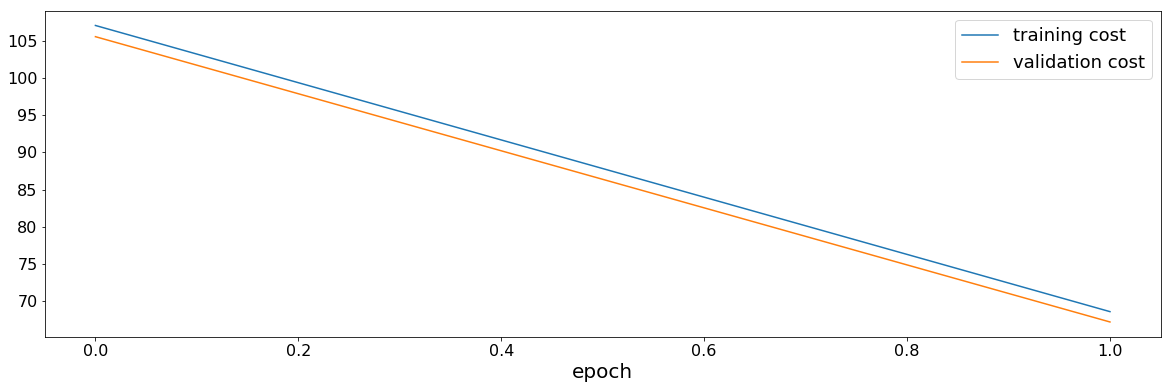

In [3]:
from src.plot import plot_costs
plot_costs(training_log)

Optional: Visualize the `tensorflow` computation graph and training metrics by executing 

```bash
tensorboard --logdir='trained_model/tensorboard'
```

and then [clicking here](http://localhost:6006). 

Compare the corrected depth profile (observed depth divided by predicted depth) with the normalized depth profile (observed depth divided by their mean): 

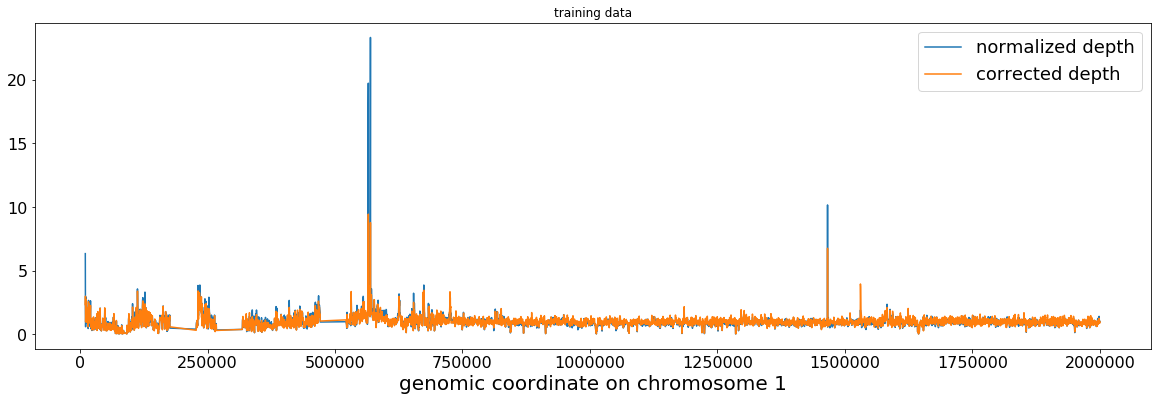

In [4]:
%matplotlib inline 
from src.plot import plot_corrected_depths, compute_observed_depth_mean

observed_depth_mean = compute_observed_depth_mean(training_data)

plot_corrected_depths(training_data, observed_depth_mean, title='training data')

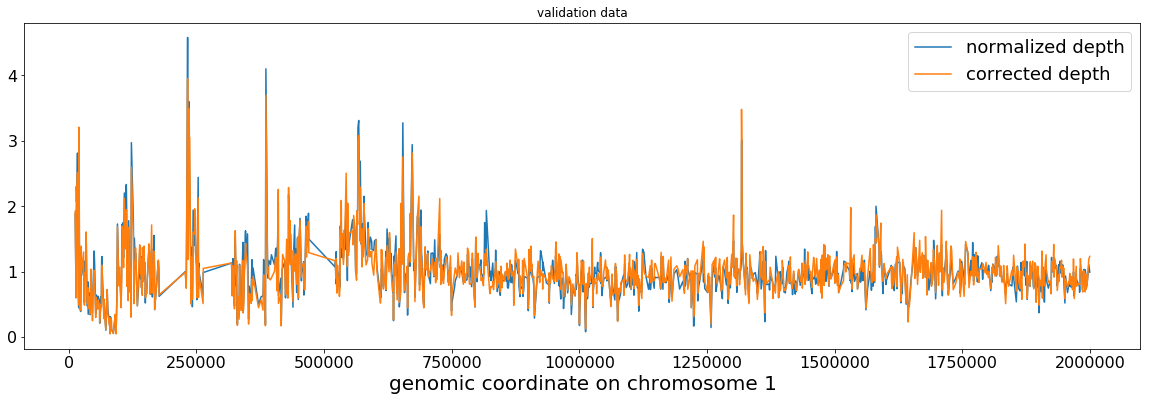

In [5]:
plot_corrected_depths(validation_data, observed_depth_mean, title='validation data')

I used the trained model to make predictions on an independent test set containing a chromosomal deletion: 

In [6]:
from src.test import unpickle 
test_data = unpickle('trained_model/test_data')
test_data.head()

,chromosome_number,end,observed_depth,sequence,start,predicted_depth
0,1,189654300,51.12,TCTTATTAGCAAGAAAAAAAAAATACCAGCAAAAGGTTGTAAAACA...,189654000,48.388237
1,1,189654600,50.34,TGCCTAGAATCTGATCTGTTCAGAAAGCAGACAGCAGTTGTTAGAT...,189654300,55.559875
2,1,189654900,47.85,ATTGGAGCTGTAGTAGCCATCCTGACACCATGAGGAGAAGTTTTGA...,189654600,56.386429
3,1,189655200,52.90,GAAAATTCAAGTTAGTAAATTCTTAAAAACTTTCTCTTTCTTCCTG...,189654900,50.427254
4,1,189655500,49.91,CGTATTATTGCTTCTATTAATGTTGTTCACTATTTACCAAATGTAA...,189655200,51.917294


Visually inspect the generalization performance of the prediction algorithm on the test set:

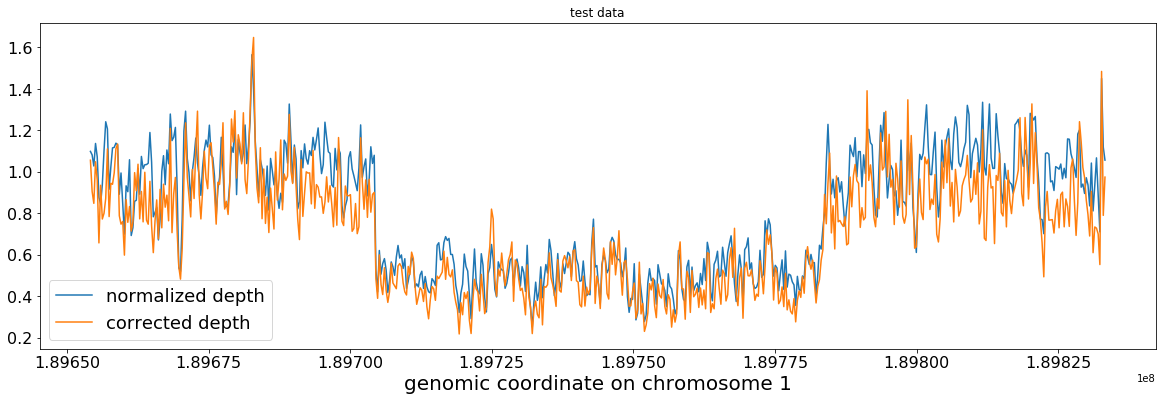

In [7]:
plot_corrected_depths(test_data, observed_depth_mean, title='test data')